# pystan part 3

In [17]:
%load_ext autoreload
%autoreload 2
import pystan
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import arviz

sns.set()
np.random.seed(101)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## logistic regression

In [2]:
# lets load some data:
# likelihood to be male based on height and weight
df = pd.read_csv('../data/HtWt.csv')
df.head()

,male,height,weight
0,0,63.2,168.7
1,0,68.7,169.8
2,0,64.8,176.6
3,0,67.9,246.8
4,1,68.9,151.6


In [18]:
log_reg_dat = {
             'n': len(df),
             'male': df.male,  # binary
             'height': df.height,
             'weight': df.weight
            }

In [19]:
sm  = pystan.StanModel(file="../stan_scripts/logistic.stan")
fit = sm.sampling(data=log_reg_dat, 
                  iter=2000, 
                  chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_8a6cdeb95a51e84955a773dea19dead7 NOW.


In [20]:
df_trace = pd.DataFrame(fit.extract(['c', 'b', 'a']))

In [21]:
fit.extract().keys()

odict_keys(['a', 'b', 'c', 'lp__'])

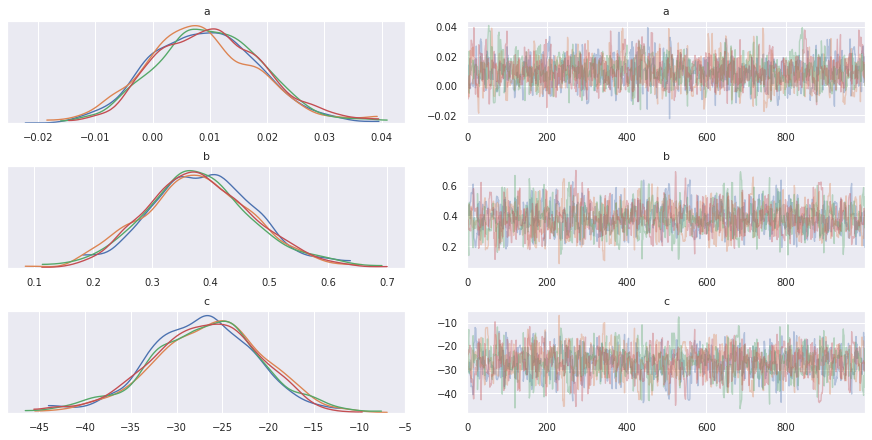

In [22]:
arviz.plot_trace(fit)
plt.show()